# Random Forest

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler

In [223]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         1168 non-null   object
 1   date            1168 non-null   object
 2   malfunction     1168 non-null   int64 
 3   feature1        1168 non-null   int64 
 4   feature2        1168 non-null   int64 
 5   feature3        1168 non-null   int64 
 6   feature4        1168 non-null   int64 
 7   feature5        1168 non-null   int64 
 8   feature6        1168 non-null   int64 
 9   feature7        1168 non-null   int64 
 10  feature9        1168 non-null   int64 
 11  active          1168 non-null   int64 
 12  month           1168 non-null   int64 
 13  Day_of_week     1168 non-null   int64 
 14  max_date        1168 non-null   object
 15  failure_before  1168 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 146.1+ KB


In [224]:
df.drop(['date','max_date'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         1168 non-null   object
 1   malfunction     1168 non-null   int64 
 2   feature1        1168 non-null   int64 
 3   feature2        1168 non-null   int64 
 4   feature3        1168 non-null   int64 
 5   feature4        1168 non-null   int64 
 6   feature5        1168 non-null   int64 
 7   feature6        1168 non-null   int64 
 8   feature7        1168 non-null   int64 
 9   feature9        1168 non-null   int64 
 10  active          1168 non-null   int64 
 11  month           1168 non-null   int64 
 12  Day_of_week     1168 non-null   int64 
 13  failure_before  1168 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 127.9+ KB


In [225]:
df.nunique()

,0
product,7
malfunction,2
feature1,1168
feature2,102
feature3,43
feature4,55
feature5,58
feature6,1129
feature7,14
feature9,63


In [226]:
scaler = StandardScaler()
num_vars = ['feature1', 'feature2', 'feature6']
df[num_vars] = scaler.fit_transform(df[num_vars])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product         1168 non-null   object 
 1   malfunction     1168 non-null   int64  
 2   feature1        1168 non-null   float64
 3   feature2        1168 non-null   float64
 4   feature3        1168 non-null   int64  
 5   feature4        1168 non-null   int64  
 6   feature5        1168 non-null   int64  
 7   feature6        1168 non-null   float64
 8   feature7        1168 non-null   int64  
 9   feature9        1168 non-null   int64  
 10  active          1168 non-null   int64  
 11  month           1168 non-null   int64  
 12  Day_of_week     1168 non-null   int64  
 13  failure_before  1168 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 127.9+ KB


In [227]:
for col in ['month','Day_of_week', 'feature3', 'feature4', 'feature5', 'feature7', 'feature9']:
  df[col] = df[col].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product         1168 non-null   object 
 1   malfunction     1168 non-null   int64  
 2   feature1        1168 non-null   float64
 3   feature2        1168 non-null   float64
 4   feature3        1168 non-null   object 
 5   feature4        1168 non-null   object 
 6   feature5        1168 non-null   object 
 7   feature6        1168 non-null   float64
 8   feature7        1168 non-null   object 
 9   feature9        1168 non-null   object 
 10  active          1168 non-null   int64  
 11  month           1168 non-null   object 
 12  Day_of_week     1168 non-null   object 
 13  failure_before  1168 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 127.9+ KB


In [228]:
df = pd.get_dummies(df, drop_first = True)
df.shape

(1168, 254)

In [254]:
print(df.shape)
df['malfunction'].value_counts()

(1168, 254)


,count
malfunction,
0,1161
1,7


In [255]:
X = df.drop('malfunction', axis = 1)
Y = df['malfunction']      #target

# Resampling

> Oversampling

In [256]:
oversample = RandomOverSampler(sampling_strategy = 'minority')
x, y = oversample.fit_resample(X, Y)
print(Counter(y))

Counter({0: 1161, 1: 1161})


In [257]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 42)
print(len(X_train), len(X_test))

1741 581


In [258]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [259]:
rfc_pred = rfc.predict(X_test)

print ("Train Accuracy=", round(accuracy_score(Y_train, rfc.predict(X_train)), 4))
print ("Test Accuracy=", round(accuracy_score(Y_test, rfc_pred), 4))

Train Accuracy= 1.0
Test Accuracy= 1.0


In [260]:
cm = confusion_matrix(Y_test, rfc_pred)
print('Confusion matrix:')
print(cm)

print('Classification Report:')
print(classification_report(Y_test, rfc_pred))

Confusion matrix:
[[291   0]
 [  0 290]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       290

    accuracy                           1.00       581
   macro avg       1.00      1.00      1.00       581
weighted avg       1.00      1.00      1.00       581



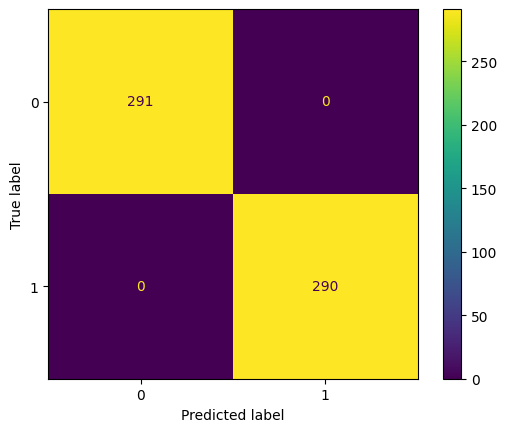

In [261]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot()

<Axes: ylabel='Features'>

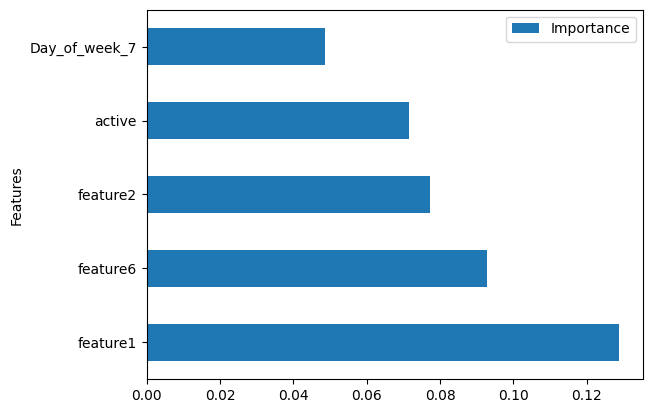

In [262]:
rfc.fit(X, Y)

features = pd.DataFrame()
features['Features']= X.columns
features['Importance'] = rfc.feature_importances_
features.sort_values(by = ['Importance'], ascending = False, inplace = True)
features.set_index('Features', inplace = True)
features.iloc[:5,:].plot(kind = 'barh')

In [263]:
pred_proba = rfc.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, pred_proba[:,1])

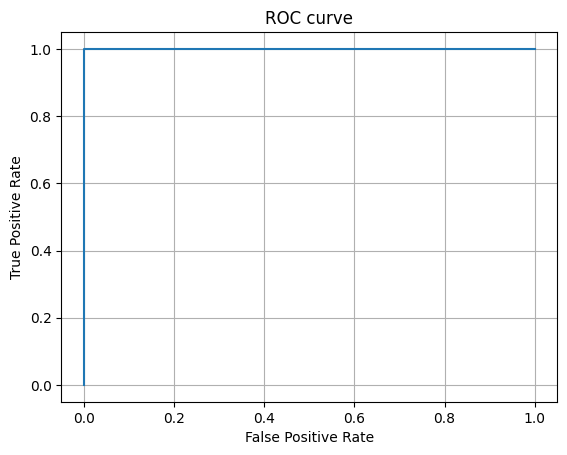

In [264]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid(True)

In [221]:
#precision, recall, threshold = precision_recall_curve(Y_test, rfc_pred)

#plt.plot(recall, precision)
#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.title('Precision-Recall Curve')
#plt.show()

>> It appears oversampling makes a perfect classifier.